In [1]:
import itk
from itkwidgets import view

# Read h5

In [50]:
import h5py
# read h5py
path = '/home/hynx/regis/recursive-cascaded-networks/datasets/lits.h5'
# path = '/home/hynx/regis/recursive-cascaded-networks/datasets/lits_bkp.h5'
f = h5py.File(path, 'r')
f.keys()

<KeysViewHDF5 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']>

## Label

In [54]:
def make_seg(points, r=5):
    seg = np.zeros(data.shape)
    for p in points:
        seg[p[2]-r:p[2]+r,p[1]-r:p[1]+r,p[0]-r:p[0]+r]=1
    return seg
# l4, l3, main, l2, l1
seg_p = {
    '53':[
        [72, 86, 57], # l4
        [83,85,53], # l3
        [71,68,60], # main
        [69, 68, 83], # l2
        [70, 45, 74], # l1
    ],
    # '33': too much tumor
    # '33'
    "71":[
        [74, 96, 61], # l4
        [74, 91, 59], # l3
        [64, 81, 69], # main
        [59, 73, 83], # l2
        [53, 52, 83], # l1
    ],
    "75":[
        [], # l4
        [86, 96, 59], #l3
        [], # main
        [],
        [],
    ],
    "128":[
        [85, 92, 59],
        [88,87,57],
        [77,69,70],
        [79, 69, 79],
        [70, 63, 81]#[63,59,98]
    ],
    "40":[
        [75, 94, 65],
        [79, 86, 62],
        [63, 71, 66],
        [69,66,83],#[70, 68, 93],
        [59, 46, 87],
    ],
    # "lits/47",
    "84":[
        [71,93,63],
        [73, 94, 62], #l3
        [59,62,61], #main
        [60,63,82],
        [67,44,84]
    ],
    "115":[
        [70,91,69],
        [71,81,66],
        [54,64,76], #main
        [57,60,88],
        [59,38,82]
    ],
    "92":[
        [82,86,64],
        [85,84,61],
        [74,66,71],
        [78,63,92],
        [66,54,79]
    ],
    "51":[
    ]
}
def save_json():
    save_path = "/home/hynx/regis/recursive-cascaded-networks/landmark_json/lits17_landmark.json"
    import json
    for s in seg_p:
        [ss.reverse() for ss in seg_p[s]]
    json.dump(seg_p, open(save_path,'w'))
# save_json()

In [52]:
import numpy as np
idx = str(71)
data = np.array(f[idx]['volume'])
label = make_seg(seg_p[idx], 2)
# label = np.array(f[idx]['segmentation'])
(np.array(f[idx]['segmentation'])>1.5).sum()

63042


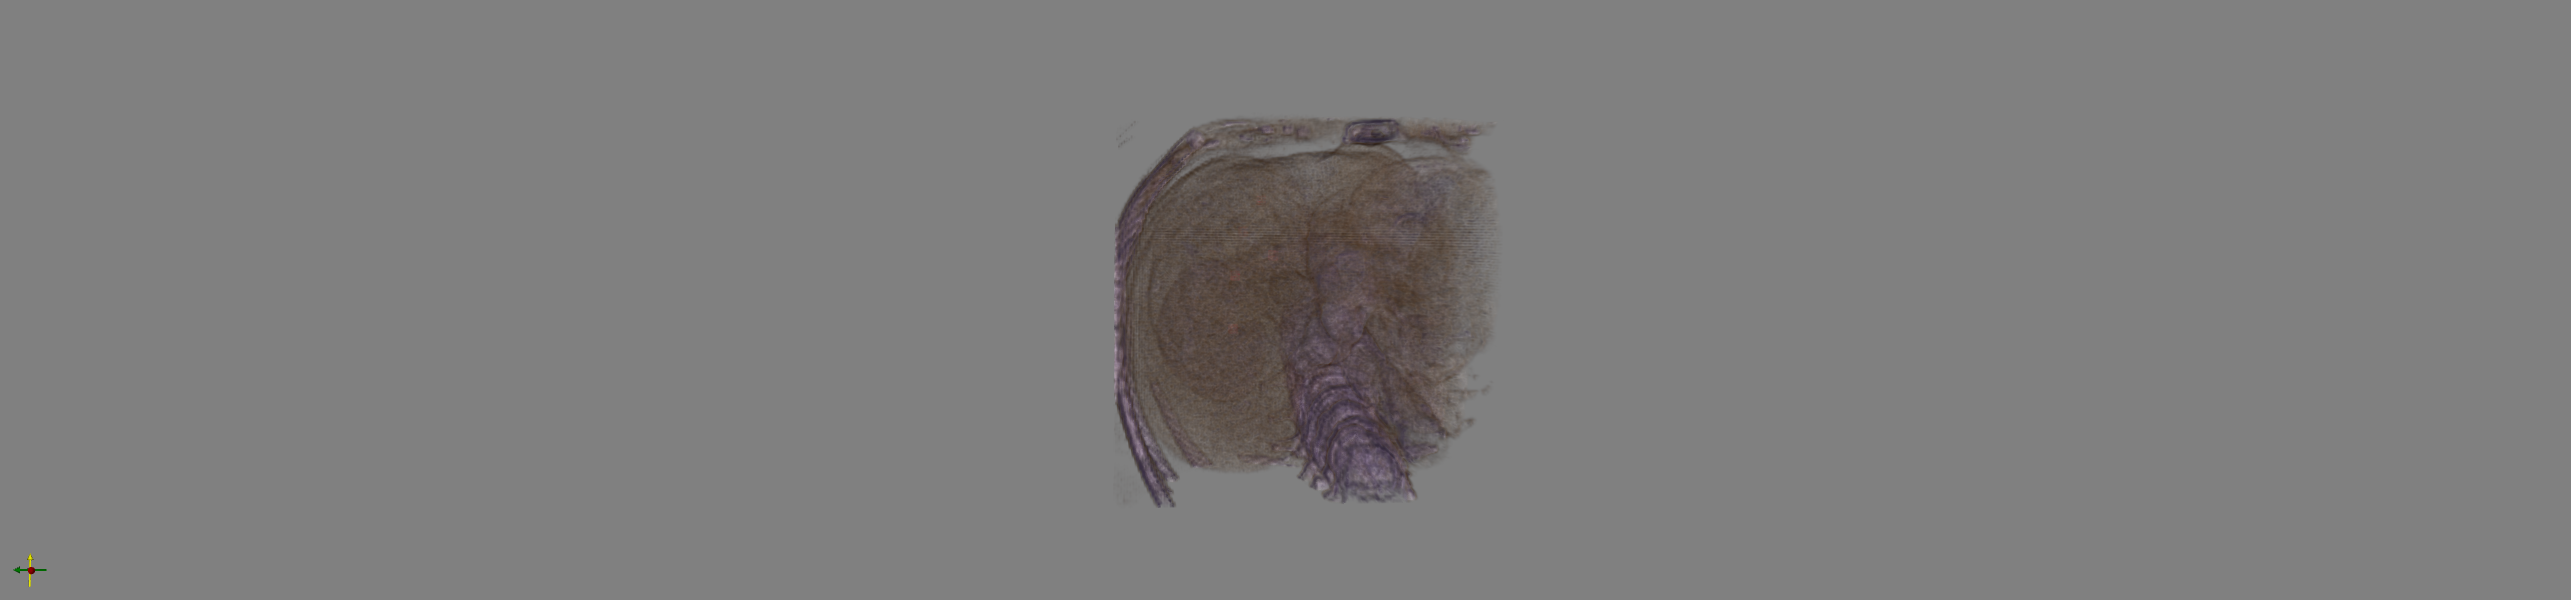
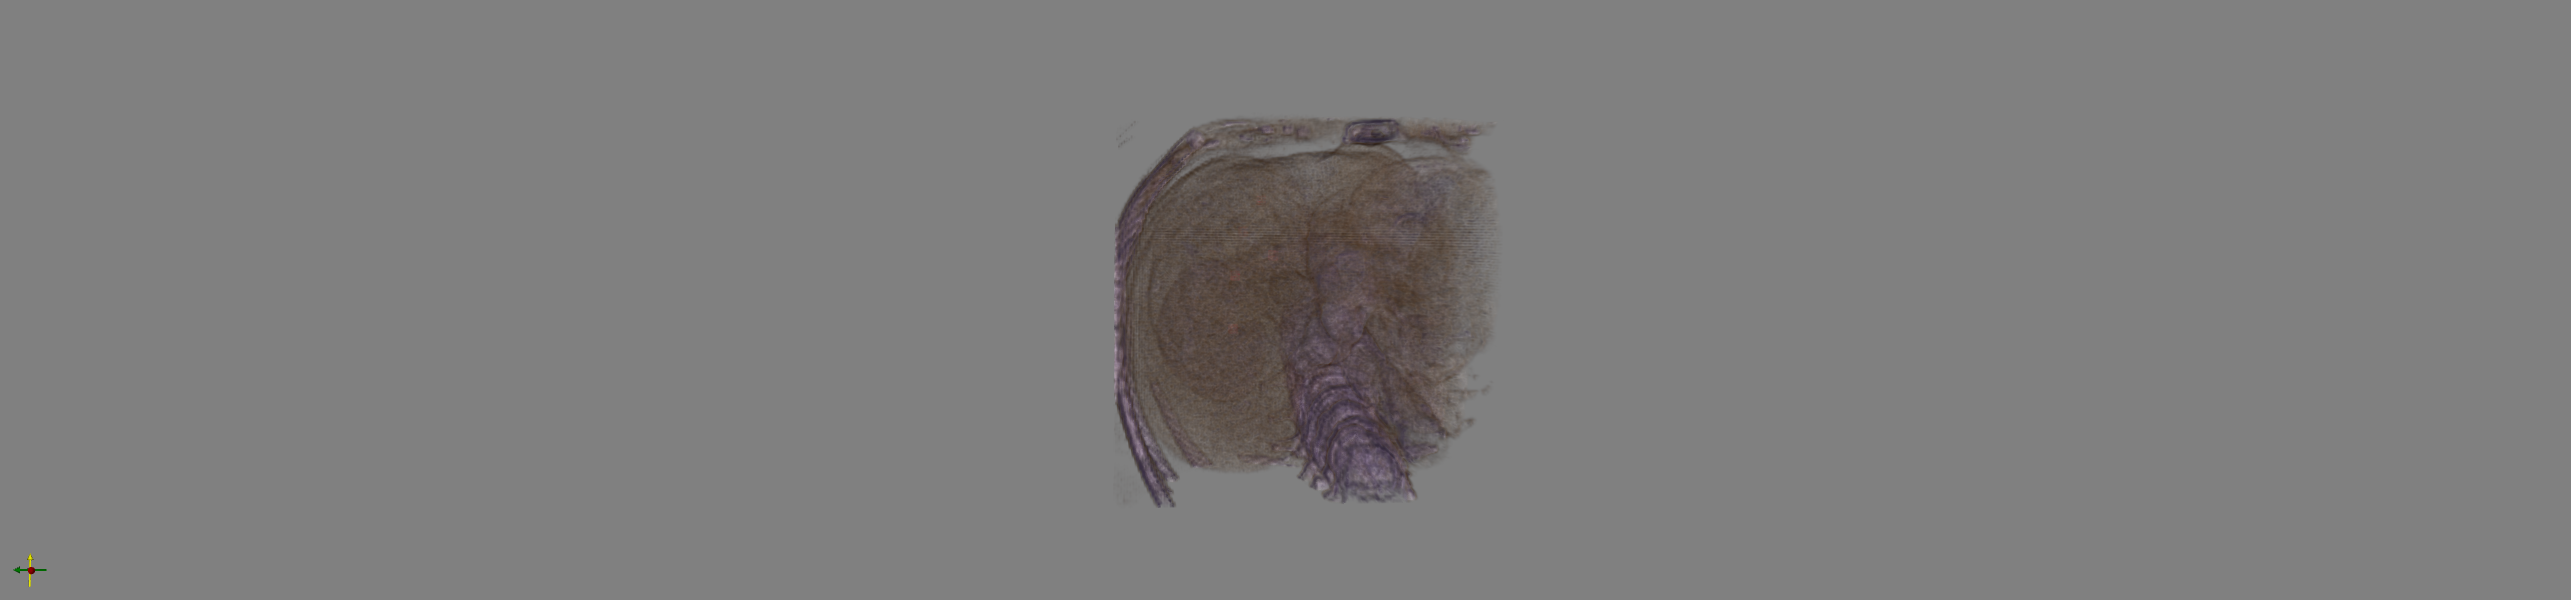

<IPython.core.display.Javascript object>

In [53]:
v=view(data, label_image=label)
# v = view(data)#, label_image=(f[idx]['segmentation'][...]>1.5).astype(np.int32))

In [35]:
import json
from pprint import pprint
json.dump(seg_p, fp=open("/home/hynx/regis/recursive-cascaded-networks/landmark_json/lits17_landmark.json", 'w'))

## Nibabel view

In [26]:
import numpy as np
def visualize_nii(id, path='/mnt/sdc/lits/train'):
    # img, meta = LoadImage()(f'{path}/volume-{id}.nii')
    import nibabel as nib
    from nibabel.orientations import io_orientation, axcodes2ornt, ornt_transform
    imgn : nib.Nifti1Image = nib.load(f'{path}/volume-{id}.nii')
    print(np.array(imgn.dataobj).shape)
    return imgn.orthoview()

In [28]:
v.position

array([200., 200., 300.])

(512, 512, 654)


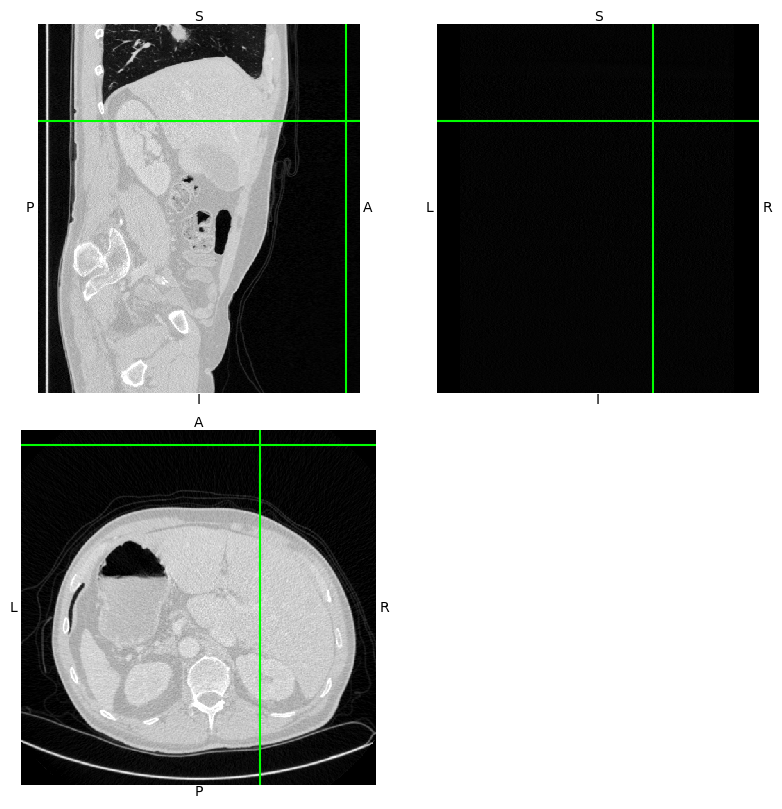

In [39]:
id = 128
v=visualize_nii(id)
v.set_position(70, 75, 350)

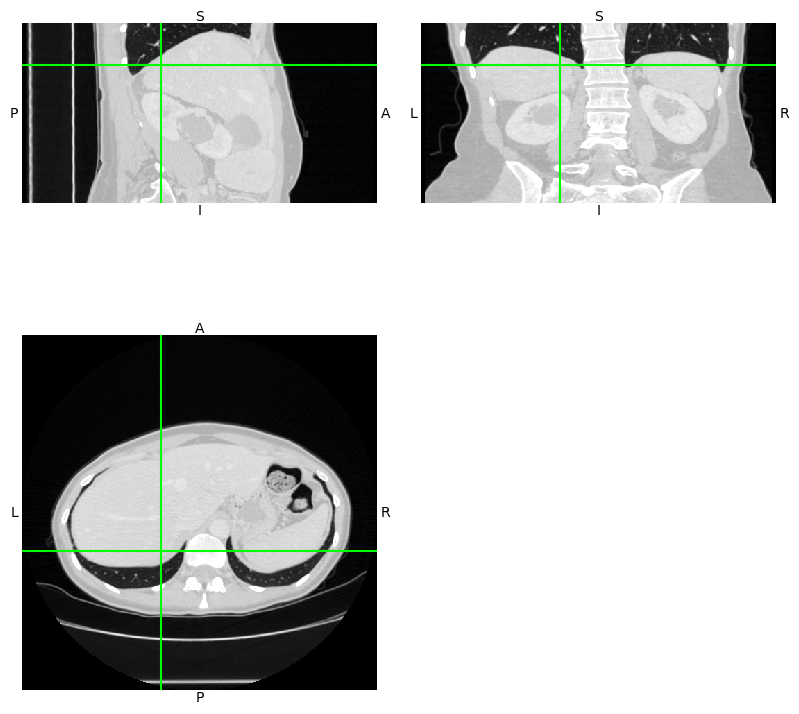

In [13]:
id = 39
v=visualize_nii(id)
v.set_position(200, 200, 200)

# Else

In [1]:
import numpy as np
import pickle as pkl
import ipyvolume.pylab as ipv

In [2]:
from adet.utils.visualize_niigz import *


def show_img(res):
    import torchvision.transforms as T
    res = tt(res)
    if res.ndim>=3:
        return T.ToPILImage()(visulize_3d(res))
    # normalize res
    res = (res-res.min())/(res.max()-res.min())
    return T.ToPILImage()(res)

## Read Pred pkl and GT files

In [3]:
fname = '/home/hynx/regis/Recursive-Cascaded-Networks/evaluate/Aug23-1306-model-99500.pkl'
mode = 'normal'
fname = '/home/hynx/regis/Recursive-Cascaded-Networks/evaluate/Aug30-1417-model-99500.pkl'
mode = 'mask'

dct = pkl.load(open(fname, 'rb'))
idx=0
k = 'warped_seg_moving'
p = np.maximum((dct[k][...,0,1]>0.5*255)*2,(dct[k][...,0,0]>0.5*255))
# include img1,2 seg1,2 warped_moving
keys = ['img1', 'img2', 'seg1', 'seg2', 'warped_moving']
seg_pairs = list(zip(*[dct[k][...,0] for k in keys], p))
keys.append(k)
# keys: img1, img2, seg1, seg2, warped_moving, warped_seg_moving
# values: shape(128, 128, 128)
ndct = [{k:v for k,v in zip(keys, s)} for s in seg_pairs]

In [4]:
import h5py
h5_name = '/home/hynx/regis/Recursive-Cascaded-Networks/datasets/lits_deform_L.h5'
reader = h5py.File(h5_name, 'r')
id1 = dct['id1'][idx][7:]
id2 = dct['id2'][idx]
gt = reader[id1]['id2'][id2]['ffd_gt'][...]
gt_flow = gt - np.mgrid[0:gt.shape[0], 0:gt.shape[1], 0:gt.shape[2]].astype(np.float32).transpose(1,2,3,0)

In [5]:
img1 = ndct[idx]['img1']
img2 = ndct[idx]['img2']
seg1 = ndct[idx]['seg1']
seg2 = ndct[idx]['seg2']
real_flow = dct['real_flow'][idx]
w_seg2 = ndct[idx]['warped_seg_moving']
from scipy.ndimage import map_coordinates
gt_seg2 = map_coordinates(seg2, gt.transpose(-1,0,1,2), order=0)

In [6]:
# show_img(map_coordinates(seg2, real_flow.transpose(-1,0,1,2)+np.mgrid[:128,:128,:128], order=0))

In [7]:
i = 8
x,y,z = np.mgrid[:i, :i, :i]*(128//i)
v = real_flow[x, y, z]
gt_v = gt_flow[x,y,z]
label = w_seg2[x, y, z]
gt_label = gt_seg2[x,y,z]

In [8]:
flt = lambda x:x.flatten().astype(float)
dist = lambda x:np.linalg.norm(x, axis=-1)

## ITK Tools

In [9]:
from itkwidgets import view
quant_values = lambda x, values: (x[...,None]>=values).sum(-1)

### Warped grid area

In [10]:
pred_flow = np.moveaxis(real_flow, -1,0)

In [11]:
def single_jacobian_det(flow):
    """
    flow has shape (batch, C, H, W, S)
    """
    flow = flow[None]
    # Compute Jacobian determinant
    batch_size, _, height, width, depth = flow.shape
    dx = flow[:, :, 1:, 1:, 1:] - flow[:, :, :-1, 1:, 1:] + 1
    dy = flow[:, :, 1:, 1:, 1:] - flow[:, :, 1:, :-1, 1:] + 1
    dz = flow[:, :, 1:, 1:, 1:] - flow[:, :, 1:, 1:, :-1] + 1
    jac = np.stack([dx, dy, dz], axis=1).transpose(0, 3, 4, 5, 1, 2)
    det = np.linalg.det(jac)
    return det[0]

In [12]:
areas = abs(single_jacobian_det(pred_flow))
# _, values = np.histogram(areas, bins=5)
values = np.percentile(areas, q=[75, 85, 95])

In [13]:
 np.histogram(areas, bins=5)

(array([2046890,    1226,     183,      70,      14]),
 array([2.5522067e-09, 3.1441808e+00, 6.2883615e+00, 9.4325418e+00,
        1.2576723e+01, 1.5720903e+01], dtype=float32))

In [14]:
areas_label = quant_values(areas,values)

In [15]:
# interpolate to same size
from scipy.ndimage import zoom
areas_label = zoom(areas_label, 128/areas_label.shape[0], order=0)

In [16]:
np.unique(areas_label, return_counts=True)

(array([0, 1, 2, 3]), array([1574491,  209581,  208669,  104411]))

In [18]:
view(img2, areas_label)

Viewer(geometries=[], gradient_opacity=0.22, interpolation=False, point_sets=[], rendered_image=<itk.itkImageP…

In [18]:
ipv.figure()
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))
ipv.scatter(x,y,z)
# ipv.plot_wireframe(*fixed_loc)
ipv.show()

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### Displacement

In [64]:
disp = dist(real_flow)
# _, values = np.histogram(disp, bins=5)
values = np.percentile(disp, q=[75, 85, 95])

In [67]:
values

array([5.03793502, 5.77158225, 7.05037947])

In [66]:
np.histogram(disp)

(array([ 43175, 604613, 679381, 466265, 218561,  63645,  17329,   3500,
           582,    101]),
 array([ 0.11235268,  1.5393678 ,  2.9663827 ,  4.393398  ,  5.820413  ,
         7.247428  ,  8.674443  , 10.101459  , 11.528473  , 12.955488  ,
        14.3825035 ], dtype=float32))

In [68]:
dist_label = quant_values(disp, values)
view(img2, dist_label)

Viewer(geometries=[], gradient_opacity=0.22, interpolation=False, point_sets=[], rendered_image=<itk.itkImageP…

## Animation

In [ ]:
red_color = np.array([255, 0, 0, 200])/255
blue_color = np.array([0, 0, 255, 200])/255

def label2color(label):
    color_label = np.where(label[...,None]==1, red_color, np.array([0.1,0.1,0.1,0.1]))
    color_label = np.where(label[...,None]==2, blue_color, color_label)
    color_label = color_label.astype(float)
    color_label = color_label.reshape(-1,color_label.shape[-1])
    return color_label

x1 = x.flatten().astype(float)
y1 = y.flatten().astype(float)
z1 = z.flatten().astype(float)

In [ ]:
rsh = lambda x:x.reshape(16,16,16)
ipv.figure()
for u,v,w in zip(rsh(x2),rsh(y2),rsh(z2)):
    ipv.plot_wireframe(u, v, w, color="pink")
ipv.show()

In [ ]:
cmap = plt.cm.get_cmap('jet')
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
plt.figure(figsize=(10,1))
plt.imshow(gradient, cmap=cmap, aspect='auto',)

In [ ]:
vx, vy, vz = v.transpose(-1,0,1,2)
msk = np.logical_or(length_v>5,label==2)
flabel = label.flatten()
x2 = x+vx
y2 = y+vy
z2 = z+vz
x2, y2, z2 = flt(x2), flt(y2), flt(z2)

xs,ys,zs = np.stack([x2,x1]),np.stack([y2,y1]),np.stack([z2,z1])
xs,ys,zs = xs[:,flabel>0], ys[:, flabel>0], zs[:, flabel>0]
fig = ipv.figure()
# get color by displacement and labels
disp = dist(v).flatten()[...,None][flabel>0]
colors = cmap()

s = ipv.scatter(xs,ys,zs, marker='sphere', color=colors, size=2)
ipv.animation_control(s)
ipv.volshow(seg2.transpose(2,1,0)/2,level=[0.5, 1], opacity=[0.01, 0.02], level_width=0.01)
ipv.show()

In [ ]:
# vx, vy, vz = v.transpose(-1,0,1,2)
vx, vy, vz = gt_v.transpose(-1,0,1,2)
x2 = x+vx
y2 = y+vy
z2 = z+vz
x2, y2, z2 = flt(x2), flt(y2), flt(z2)

xs,ys,zs = np.stack([x2,x1]),np.stack([y2,y1]),np.stack([z2,z1])
fig = ipv.figure()
s = ipv.scatter(xs,ys,zs, marker='sphere', color=label2color(gt_label), size=2)
ipv.animation_control(s)
ipv.volshow(seg2.transpose(2,1,0)/2,level=[0.5, 1], opacity=[0.01, 0.02], level_width=0.01)
ipv.show()

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c=color_label.reshape(-1,3), s=3)

## Arrow: Visualize Pred flow

In [ ]:
x = x[msk].flatten().astype(float)
y = y[msk].flatten().astype(float)
z = z[msk].flatten().astype(float)

vx, vy, vz = v[msk].T
vx = vx.flatten()
vy = vy.flatten()
vz = vz.flatten()

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(x, y, z, vx, vy, vz, arrow_length_ratio=0.6, length=1.2, pivot='middle')
ax.scatter(x,y,z, color = 'black', s=0.5)
# show the axis title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [ ]:
fig = ipv.figure()
p1 = np.zeros(3)
p2 = np.ones(3)
p3 = np.full(3, 0.5)
quiver = ipv.quiver(*np.stack([p1,p2, p3],axis=1),[1,10, 500],[1,10,500],[1,10,500], size=5)
ipv.show()

In [ ]:
fig = ipv.figure()
quiver = ipv.quiver(x, y, z, vx, vy, vz, size=5)
ipv.show()